## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

## Load data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [4]:
test.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,...,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,...,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,...,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,...,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,...,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1


In [5]:
sampleSubmission.head()

,customer_id,subscribed
0,customer_id_32884,1
1,customer_id_3169,1
2,customer_id_32206,1
3,customer_id_9403,1
4,customer_id_14020,1


## Exploratory Data Analysis

In [6]:
train.shape, test.shape

((28831, 22), (12357, 21))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
customer_id       28831 non-null object
age               28831 non-null int64
job               28831 non-null object
marital           28831 non-null object
education         28831 non-null object
default           28831 non-null object
housing           28831 non-null object
loan              28831 non-null object
contact           28831 non-null object
month             28831 non-null object
day_of_week       28831 non-null object
duration          28831 non-null float64
campaign          28831 non-null int64
pdays             28831 non-null int64
previous          28831 non-null int64
poutcome          28831 non-null object
emp_var_rate      28831 non-null float64
cons_price_idx    28831 non-null float64
cons_conf_idx     28831 non-null float64
euribor3m         28831 non-null float64
nr_employed       28831 non-null float64
subscribed        28831 non-null int64
dtypes: fl

In [8]:
train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,42.011203,4.297919,2.575769,963.215844,0.172592,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,10.450128,4.336882,2.752303,185.077567,0.494338,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,34.000000,1.700000,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,40.000000,3.000000,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,49.000000,5.300000,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000
max,100.000000,81.966667,43.000000,999.000000,7.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000,1.000000


In [9]:
target = [col for col in train.columns if col not in test.columns]
target

['subscribed']

In [10]:
# Check for missing values
train.isna().sum().sum(), test.isna().sum().sum(), sampleSubmission.isna().sum().sum()

(0, 0, 0)

## Converting some columns to dummies using label encoder

In [78]:
# Instantiate the model
label_encoder = LabelEncoder()

In [79]:
train.head().T

,0,1,2,3,4
customer_id,customer_id_39075,customer_id_34855,customer_id_7107,customer_id_31614,customer_id_34878
age,31,31,47,36,34
job,admin.,technician,blue-collar,services,admin.
marital,married,single,married,married,single
education,university.degree,university.degree,basic.6y,university.degree,high.school
default,no,no,unknown,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,no
contact,cellular,telephone,telephone,cellular,cellular
month,dec,may,may,may,may


In [80]:
# Contact
train['contact'] = label_encoder.fit_transform(train['contact'])
test['contact'] = label_encoder.fit_transform(test['contact'])

# Default
train['default'] = label_encoder.fit_transform(train['default'])
test['default'] = label_encoder.fit_transform(test['default'])

# Hosuing
train['housing'] = label_encoder.fit_transform(train['housing'])
test['housing'] = label_encoder.fit_transform(test['housing'])

# Loan
train['loan'] = label_encoder.fit_transform(train['loan'])
test['loan'] = label_encoder.fit_transform(test['loan'])

# Poutcome
train['poutcome'] = label_encoder.fit_transform(train['poutcome'])
test['poutcome'] = label_encoder.fit_transform(test['poutcome'])

# Day of the week
train['day_of_week'] = label_encoder.fit_transform(train['day_of_week'])
test['day_of_week'] = label_encoder.fit_transform(test['day_of_week'])

# Month
train['month'] = label_encoder.fit_transform(train['month'])
test['month'] = label_encoder.fit_transform(test['month'])

# Marital
train['marital'] = label_encoder.fit_transform(train['marital'])
test['marital'] = label_encoder.fit_transform(test['marital'])

# Job
train['job'] = label_encoder.fit_transform(train['job'])
test['job'] = label_encoder.fit_transform(test['job'])

# Education
train['education'] = label_encoder.fit_transform(train['education'])
test['education'] = label_encoder.fit_transform(test['education'])

# Pdays
train['pdays'] = train['pdays']/train['pdays'].mean()
test['pdays'] = test['pdays']/test['pdays'].mean()

# nr_employed
train['nr_employed'] = train['nr_employed']/train['nr_employed'].mean()
test['nr_employed'] = test['nr_employed']/test['nr_employed'].mean()

In [81]:
# Create a new column for ids
train['id'] = train['customer_id'].apply(lambda x:x.split('_')[2])
test['id'] = test['customer_id'].apply(lambda x:x.split('_')[2])

In [82]:
train['id'] = train['id'].astype('int')
test['id'] = test['id'].astype('int')

## Grouping the features into Categorical and Numerical features

In [83]:
categorical_feat = [col for col in train.columns if train[col].dtype=='O']
num_feat = [col for col in train.columns if col not in categorical_feat]

In [84]:
train[categorical_feat]

,customer_id
0,customer_id_39075
1,customer_id_34855
2,customer_id_7107
3,customer_id_31614
4,customer_id_34878
...,...
28826,customer_id_6265
28827,customer_id_11284
28828,customer_id_38158
28829,customer_id_860


In [85]:
delete = ['subscribed']
for i in delete:
    num_feat.remove(i)
num_feat

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'id']

In [86]:
X = train[num_feat]
y = train['subscribed']

## Build a base model

In [87]:
random = 314

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=random)

### Catboost Classifier

52cat 

catboost = CatBoostClassifier(iterations=1500,learning_rate=0.01,random_seed=random,l2_leaf_reg=2.5,od_type='Iter',
                              early_stopping_rounds=500,eval_metric='AUC',depth=6,rsm=0.78)
                              
53 cat

catboost = CatBoostClassifier(iterations=1500,learning_rate=0.01,random_seed=random,l2_leaf_reg=3.5,od_type='Iter',
                              early_stopping_rounds=500,eval_metric='AUC',depth=7,rsm=0.88)
                              
54 CAT
catboost = CatBoostClassifier(iterations=1500,learning_rate=0.01,random_seed=random,l2_leaf_reg=2.5,od_type='Iter',
                              early_stopping_rounds=500,eval_metric='AUC',depth=5,rsm=0.78)
training set
classifier f1 score 0.6383818450912679

testing set
classifier f1 score 0.64501679731243


57 Cat
catboost = CatBoostClassifier(iterations=2000,learning_rate=0.01,random_seed=random,l2_leaf_reg=3.5,od_type='Iter',
                              early_stopping_rounds=500,eval_metric='AUC',depth=5,rsm=0.78)
training set
classifier f1 score 0.6648780487804878

testing set
classifier f1 score 0.6592551417454141

58cat
catboost = CatBoostClassifier(iterations=1200,learning_rate=0.01,random_seed=random,l2_leaf_reg=2.5,od_type='Iter',
                              early_stopping_rounds=500,eval_metric='AUC',depth=5,rsm=0.78)
                              
59cat
catboost = CatBoostClassifier(iterations=1000,learning_rate=0.01,random_seed=random,l2_leaf_reg=.5,od_type='Iter',
                              early_stopping_rounds=500,eval_metric='AUC',depth=5,rsm=0.78)

In [89]:
catboost = CatBoostClassifier(iterations=1500,learning_rate=0.01,random_seed=random,l2_leaf_reg=2.5,od_type='Iter',
                              early_stopping_rounds=500,eval_metric='AUC',depth=5,rsm=0.78)

In [90]:
catboost.fit(X,y,eval_set=(X_test,y_test),use_best_model=True)

0:	test: 0.8924669	best: 0.8924669 (0)	total: 16.3ms	remaining: 24.4s
1:	test: 0.9122522	best: 0.9122522 (1)	total: 31.6ms	remaining: 23.6s
2:	test: 0.9193793	best: 0.9193793 (2)	total: 46.9ms	remaining: 23.4s
3:	test: 0.9216130	best: 0.9216130 (3)	total: 63.6ms	remaining: 23.8s
4:	test: 0.9204883	best: 0.9216130 (3)	total: 79.1ms	remaining: 23.7s
5:	test: 0.9241009	best: 0.9241009 (5)	total: 94.2ms	remaining: 23.5s
6:	test: 0.9246218	best: 0.9246218 (6)	total: 110ms	remaining: 23.6s
7:	test: 0.9261692	best: 0.9261692 (7)	total: 125ms	remaining: 23.3s
8:	test: 0.9249949	best: 0.9261692 (7)	total: 141ms	remaining: 23.3s
9:	test: 0.9252765	best: 0.9261692 (7)	total: 155ms	remaining: 23.1s
10:	test: 0.9259855	best: 0.9261692 (7)	total: 170ms	remaining: 23s
11:	test: 0.9256548	best: 0.9261692 (7)	total: 192ms	remaining: 23.8s
12:	test: 0.9259944	best: 0.9261692 (7)	total: 206ms	remaining: 23.6s
13:	test: 0.9261854	best: 0.9261854 (13)	total: 227ms	remaining: 24.1s
14:	test: 0.9255357	best:

121:	test: 0.9329766	best: 0.9329766 (121)	total: 2.05s	remaining: 23.1s
122:	test: 0.9329918	best: 0.9329918 (122)	total: 2.07s	remaining: 23.1s
123:	test: 0.9330160	best: 0.9330160 (123)	total: 2.08s	remaining: 23.1s
124:	test: 0.9331280	best: 0.9331280 (124)	total: 2.1s	remaining: 23.1s
125:	test: 0.9332470	best: 0.9332470 (125)	total: 2.11s	remaining: 23s
126:	test: 0.9333778	best: 0.9333778 (126)	total: 2.13s	remaining: 23s
127:	test: 0.9335127	best: 0.9335127 (127)	total: 2.15s	remaining: 23s
128:	test: 0.9336574	best: 0.9336574 (128)	total: 2.16s	remaining: 23s
129:	test: 0.9337758	best: 0.9337758 (129)	total: 2.18s	remaining: 23s
130:	test: 0.9338193	best: 0.9338193 (130)	total: 2.2s	remaining: 23s
131:	test: 0.9339275	best: 0.9339275 (131)	total: 2.22s	remaining: 23s
132:	test: 0.9341498	best: 0.9341498 (132)	total: 2.23s	remaining: 23s
133:	test: 0.9342638	best: 0.9342638 (133)	total: 2.25s	remaining: 22.9s
134:	test: 0.9342621	best: 0.9342638 (133)	total: 2.28s	remaining: 23

235:	test: 0.9406268	best: 0.9406268 (235)	total: 4.02s	remaining: 21.6s
236:	test: 0.9406530	best: 0.9406530 (236)	total: 4.04s	remaining: 21.6s
237:	test: 0.9406747	best: 0.9406747 (237)	total: 4.06s	remaining: 21.5s
238:	test: 0.9407148	best: 0.9407148 (238)	total: 4.08s	remaining: 21.5s
239:	test: 0.9407658	best: 0.9407658 (239)	total: 4.09s	remaining: 21.5s
240:	test: 0.9408149	best: 0.9408149 (240)	total: 4.11s	remaining: 21.5s
241:	test: 0.9408934	best: 0.9408934 (241)	total: 4.13s	remaining: 21.4s
242:	test: 0.9409291	best: 0.9409291 (242)	total: 4.14s	remaining: 21.4s
243:	test: 0.9409275	best: 0.9409291 (242)	total: 4.16s	remaining: 21.4s
244:	test: 0.9409367	best: 0.9409367 (244)	total: 4.18s	remaining: 21.4s
245:	test: 0.9410026	best: 0.9410026 (245)	total: 4.2s	remaining: 21.4s
246:	test: 0.9410336	best: 0.9410336 (246)	total: 4.22s	remaining: 21.4s
247:	test: 0.9410912	best: 0.9410912 (247)	total: 4.24s	remaining: 21.4s
248:	test: 0.9411275	best: 0.9411275 (248)	total: 4.

355:	test: 0.9444964	best: 0.9444964 (355)	total: 6.14s	remaining: 19.7s
356:	test: 0.9445378	best: 0.9445378 (356)	total: 6.17s	remaining: 19.7s
357:	test: 0.9445652	best: 0.9445652 (357)	total: 6.18s	remaining: 19.7s
358:	test: 0.9445697	best: 0.9445697 (358)	total: 6.2s	remaining: 19.7s
359:	test: 0.9445951	best: 0.9445951 (359)	total: 6.22s	remaining: 19.7s
360:	test: 0.9446229	best: 0.9446229 (360)	total: 6.24s	remaining: 19.7s
361:	test: 0.9446653	best: 0.9446653 (361)	total: 6.25s	remaining: 19.7s
362:	test: 0.9447080	best: 0.9447080 (362)	total: 6.27s	remaining: 19.6s
363:	test: 0.9447278	best: 0.9447278 (363)	total: 6.29s	remaining: 19.6s
364:	test: 0.9447397	best: 0.9447397 (364)	total: 6.3s	remaining: 19.6s
365:	test: 0.9447529	best: 0.9447529 (365)	total: 6.32s	remaining: 19.6s
366:	test: 0.9447823	best: 0.9447823 (366)	total: 6.34s	remaining: 19.6s
367:	test: 0.9448328	best: 0.9448328 (367)	total: 6.36s	remaining: 19.6s
368:	test: 0.9448668	best: 0.9448668 (368)	total: 6.3

470:	test: 0.9467391	best: 0.9467391 (470)	total: 8.23s	remaining: 18s
471:	test: 0.9467641	best: 0.9467641 (471)	total: 8.25s	remaining: 18s
472:	test: 0.9467984	best: 0.9467984 (472)	total: 8.27s	remaining: 18s
473:	test: 0.9468126	best: 0.9468126 (473)	total: 8.28s	remaining: 17.9s
474:	test: 0.9468259	best: 0.9468259 (474)	total: 8.31s	remaining: 17.9s
475:	test: 0.9468504	best: 0.9468504 (475)	total: 8.33s	remaining: 17.9s
476:	test: 0.9468568	best: 0.9468568 (476)	total: 8.35s	remaining: 17.9s
477:	test: 0.9468681	best: 0.9468681 (477)	total: 8.36s	remaining: 17.9s
478:	test: 0.9468846	best: 0.9468846 (478)	total: 8.38s	remaining: 17.9s
479:	test: 0.9469107	best: 0.9469107 (479)	total: 8.39s	remaining: 17.8s
480:	test: 0.9469199	best: 0.9469199 (480)	total: 8.41s	remaining: 17.8s
481:	test: 0.9469394	best: 0.9469394 (481)	total: 8.43s	remaining: 17.8s
482:	test: 0.9469665	best: 0.9469665 (482)	total: 8.45s	remaining: 17.8s
483:	test: 0.9469799	best: 0.9469799 (483)	total: 8.46s	r

583:	test: 0.9485188	best: 0.9485188 (583)	total: 10.2s	remaining: 16s
584:	test: 0.9485461	best: 0.9485461 (584)	total: 10.2s	remaining: 16s
585:	test: 0.9485616	best: 0.9485616 (585)	total: 10.2s	remaining: 16s
586:	test: 0.9485741	best: 0.9485741 (586)	total: 10.3s	remaining: 16s
587:	test: 0.9485852	best: 0.9485852 (587)	total: 10.3s	remaining: 16s
588:	test: 0.9485992	best: 0.9485992 (588)	total: 10.3s	remaining: 15.9s
589:	test: 0.9486085	best: 0.9486085 (589)	total: 10.3s	remaining: 15.9s
590:	test: 0.9486305	best: 0.9486305 (590)	total: 10.4s	remaining: 15.9s
591:	test: 0.9486407	best: 0.9486407 (591)	total: 10.4s	remaining: 15.9s
592:	test: 0.9486593	best: 0.9486593 (592)	total: 10.4s	remaining: 15.9s
593:	test: 0.9486717	best: 0.9486717 (593)	total: 10.4s	remaining: 15.9s
594:	test: 0.9486826	best: 0.9486826 (594)	total: 10.4s	remaining: 15.9s
595:	test: 0.9486903	best: 0.9486903 (595)	total: 10.5s	remaining: 15.9s
596:	test: 0.9487139	best: 0.9487139 (596)	total: 10.5s	remai

702:	test: 0.9498848	best: 0.9498848 (702)	total: 12.4s	remaining: 14s
703:	test: 0.9498981	best: 0.9498981 (703)	total: 12.4s	remaining: 14s
704:	test: 0.9498990	best: 0.9498990 (704)	total: 12.4s	remaining: 14s
705:	test: 0.9499115	best: 0.9499115 (705)	total: 12.4s	remaining: 14s
706:	test: 0.9499219	best: 0.9499219 (706)	total: 12.5s	remaining: 14s
707:	test: 0.9499302	best: 0.9499302 (707)	total: 12.5s	remaining: 13.9s
708:	test: 0.9499444	best: 0.9499444 (708)	total: 12.5s	remaining: 13.9s
709:	test: 0.9499587	best: 0.9499587 (709)	total: 12.5s	remaining: 13.9s
710:	test: 0.9499646	best: 0.9499646 (710)	total: 12.5s	remaining: 13.9s
711:	test: 0.9499699	best: 0.9499699 (711)	total: 12.5s	remaining: 13.9s
712:	test: 0.9499909	best: 0.9499909 (712)	total: 12.5s	remaining: 13.8s
713:	test: 0.9499920	best: 0.9499920 (713)	total: 12.6s	remaining: 13.8s
714:	test: 0.9500066	best: 0.9500066 (714)	total: 12.6s	remaining: 13.8s
715:	test: 0.9500147	best: 0.9500147 (715)	total: 12.6s	remai

823:	test: 0.9510670	best: 0.9510670 (823)	total: 14.4s	remaining: 11.8s
824:	test: 0.9510839	best: 0.9510839 (824)	total: 14.4s	remaining: 11.8s
825:	test: 0.9510887	best: 0.9510887 (825)	total: 14.4s	remaining: 11.7s
826:	test: 0.9510964	best: 0.9510964 (826)	total: 14.4s	remaining: 11.7s
827:	test: 0.9511056	best: 0.9511056 (827)	total: 14.4s	remaining: 11.7s
828:	test: 0.9511112	best: 0.9511112 (828)	total: 14.4s	remaining: 11.7s
829:	test: 0.9511236	best: 0.9511236 (829)	total: 14.5s	remaining: 11.7s
830:	test: 0.9511227	best: 0.9511236 (829)	total: 14.5s	remaining: 11.6s
831:	test: 0.9511338	best: 0.9511338 (831)	total: 14.5s	remaining: 11.6s
832:	test: 0.9511441	best: 0.9511441 (832)	total: 14.5s	remaining: 11.6s
833:	test: 0.9511558	best: 0.9511558 (833)	total: 14.5s	remaining: 11.6s
834:	test: 0.9511607	best: 0.9511607 (834)	total: 14.5s	remaining: 11.6s
835:	test: 0.9511811	best: 0.9511811 (835)	total: 14.5s	remaining: 11.6s
836:	test: 0.9511951	best: 0.9511951 (836)	total: 1

944:	test: 0.9521671	best: 0.9521671 (944)	total: 16.4s	remaining: 9.6s
945:	test: 0.9521809	best: 0.9521809 (945)	total: 16.4s	remaining: 9.59s
946:	test: 0.9521952	best: 0.9521952 (946)	total: 16.4s	remaining: 9.57s
947:	test: 0.9522032	best: 0.9522032 (947)	total: 16.4s	remaining: 9.55s
948:	test: 0.9522151	best: 0.9522151 (948)	total: 16.4s	remaining: 9.53s
949:	test: 0.9522244	best: 0.9522244 (949)	total: 16.4s	remaining: 9.51s
950:	test: 0.9522281	best: 0.9522281 (950)	total: 16.4s	remaining: 9.49s
951:	test: 0.9522395	best: 0.9522395 (951)	total: 16.5s	remaining: 9.48s
952:	test: 0.9522393	best: 0.9522395 (951)	total: 16.5s	remaining: 9.46s
953:	test: 0.9522426	best: 0.9522426 (953)	total: 16.5s	remaining: 9.44s
954:	test: 0.9522545	best: 0.9522545 (954)	total: 16.5s	remaining: 9.42s
955:	test: 0.9522633	best: 0.9522633 (955)	total: 16.5s	remaining: 9.41s
956:	test: 0.9522698	best: 0.9522698 (956)	total: 16.5s	remaining: 9.39s
957:	test: 0.9522827	best: 0.9522827 (957)	total: 16

1064:	test: 0.9532482	best: 0.9532482 (1064)	total: 18.4s	remaining: 7.5s
1065:	test: 0.9532621	best: 0.9532621 (1065)	total: 18.4s	remaining: 7.48s
1066:	test: 0.9532684	best: 0.9532684 (1066)	total: 18.4s	remaining: 7.46s
1067:	test: 0.9532718	best: 0.9532718 (1067)	total: 18.4s	remaining: 7.45s
1068:	test: 0.9532733	best: 0.9532733 (1068)	total: 18.4s	remaining: 7.43s
1069:	test: 0.9532780	best: 0.9532780 (1069)	total: 18.4s	remaining: 7.41s
1070:	test: 0.9532838	best: 0.9532838 (1070)	total: 18.5s	remaining: 7.39s
1071:	test: 0.9532948	best: 0.9532948 (1071)	total: 18.5s	remaining: 7.38s
1072:	test: 0.9533041	best: 0.9533041 (1072)	total: 18.5s	remaining: 7.36s
1073:	test: 0.9533066	best: 0.9533066 (1073)	total: 18.5s	remaining: 7.34s
1074:	test: 0.9533109	best: 0.9533109 (1074)	total: 18.5s	remaining: 7.33s
1075:	test: 0.9533198	best: 0.9533198 (1075)	total: 18.6s	remaining: 7.31s
1076:	test: 0.9533367	best: 0.9533367 (1076)	total: 18.6s	remaining: 7.29s
1077:	test: 0.9533515	best

1182:	test: 0.9542561	best: 0.9542561 (1182)	total: 20.4s	remaining: 5.46s
1183:	test: 0.9542585	best: 0.9542585 (1183)	total: 20.4s	remaining: 5.44s
1184:	test: 0.9542745	best: 0.9542745 (1184)	total: 20.4s	remaining: 5.42s
1185:	test: 0.9542730	best: 0.9542745 (1184)	total: 20.4s	remaining: 5.41s
1186:	test: 0.9542811	best: 0.9542811 (1186)	total: 20.4s	remaining: 5.39s
1187:	test: 0.9542869	best: 0.9542869 (1187)	total: 20.5s	remaining: 5.37s
1188:	test: 0.9542916	best: 0.9542916 (1188)	total: 20.5s	remaining: 5.36s
1189:	test: 0.9543003	best: 0.9543003 (1189)	total: 20.5s	remaining: 5.34s
1190:	test: 0.9543116	best: 0.9543116 (1190)	total: 20.5s	remaining: 5.32s
1191:	test: 0.9543240	best: 0.9543240 (1191)	total: 20.5s	remaining: 5.3s
1192:	test: 0.9543392	best: 0.9543392 (1192)	total: 20.5s	remaining: 5.29s
1193:	test: 0.9543466	best: 0.9543466 (1193)	total: 20.6s	remaining: 5.27s
1194:	test: 0.9543446	best: 0.9543466 (1193)	total: 20.6s	remaining: 5.25s
1195:	test: 0.9543546	best

1293:	test: 0.9550363	best: 0.9550363 (1293)	total: 22.2s	remaining: 3.53s
1294:	test: 0.9550359	best: 0.9550363 (1293)	total: 22.2s	remaining: 3.51s
1295:	test: 0.9550396	best: 0.9550396 (1295)	total: 22.2s	remaining: 3.5s
1296:	test: 0.9550437	best: 0.9550437 (1296)	total: 22.2s	remaining: 3.48s
1297:	test: 0.9550579	best: 0.9550579 (1297)	total: 22.2s	remaining: 3.46s
1298:	test: 0.9550687	best: 0.9550687 (1298)	total: 22.3s	remaining: 3.44s
1299:	test: 0.9550797	best: 0.9550797 (1299)	total: 22.3s	remaining: 3.43s
1300:	test: 0.9550947	best: 0.9550947 (1300)	total: 22.3s	remaining: 3.41s
1301:	test: 0.9550935	best: 0.9550947 (1300)	total: 22.3s	remaining: 3.39s
1302:	test: 0.9550997	best: 0.9550997 (1302)	total: 22.3s	remaining: 3.38s
1303:	test: 0.9551060	best: 0.9551060 (1303)	total: 22.4s	remaining: 3.36s
1304:	test: 0.9551114	best: 0.9551114 (1304)	total: 22.4s	remaining: 3.34s
1305:	test: 0.9551198	best: 0.9551198 (1305)	total: 22.4s	remaining: 3.33s
1306:	test: 0.9551332	best

1403:	test: 0.9558191	best: 0.9558191 (1403)	total: 24s	remaining: 1.64s
1404:	test: 0.9558329	best: 0.9558329 (1404)	total: 24s	remaining: 1.62s
1405:	test: 0.9558423	best: 0.9558423 (1405)	total: 24s	remaining: 1.6s
1406:	test: 0.9558520	best: 0.9558520 (1406)	total: 24s	remaining: 1.59s
1407:	test: 0.9558565	best: 0.9558565 (1407)	total: 24s	remaining: 1.57s
1408:	test: 0.9558646	best: 0.9558646 (1408)	total: 24.1s	remaining: 1.55s
1409:	test: 0.9558717	best: 0.9558717 (1409)	total: 24.1s	remaining: 1.54s
1410:	test: 0.9558847	best: 0.9558847 (1410)	total: 24.1s	remaining: 1.52s
1411:	test: 0.9558920	best: 0.9558920 (1411)	total: 24.1s	remaining: 1.5s
1412:	test: 0.9558963	best: 0.9558963 (1412)	total: 24.1s	remaining: 1.48s
1413:	test: 0.9559028	best: 0.9559028 (1413)	total: 24.1s	remaining: 1.47s
1414:	test: 0.9559051	best: 0.9559051 (1414)	total: 24.1s	remaining: 1.45s
1415:	test: 0.9559130	best: 0.9559130 (1415)	total: 24.2s	remaining: 1.43s
1416:	test: 0.9559238	best: 0.9559238

In [91]:
catboost_pred = catboost.predict(X_test)
catboost_pred2 = catboost.predict(X_train)

In [92]:
print('training set')
print('classifier f1 score {}'. format(f1_score(y_train, catboost_pred2).mean()))
print('')
print('testing set')
print('classifier f1 score {}'. format(f1_score(y_test, catboost_pred).mean()))

training set
classifier f1 score 0.6383818450912679

testing set
classifier f1 score 0.64501679731243


### Ligth Boost Classifier

In [235]:
lgm = LGBMClassifier(n_estimators=1000, learning_rate=0.4, max_depth=5, min_child_samples=399, num_leaves=42,
                     #feature_fraction=0.8,
                     subsample=0.855, reg_alpha=2, reg_lambda=5, colsample_bytree=0.9234,
                     silent=True, subsample_for_bin=200000,subsample_freq=1,min_child_weight=0.1, min_split_gain=0.0,
                     bagging_freq=5, n_jobs=4, boosting_type='gbdt',#num_boost_round=230,early_stopping_rounds=30,
                     random_seed=random)

In [236]:
lgm.fit(X,y,eval_set=(X_test,y_test))

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[1]	valid_0's binary_logloss: 0.244553
[2]	valid_0's binary_logloss: 0.220684
[3]	valid_0's binary_logloss: 0.207012
[4]	valid_0's binary_logloss: 0.199273
[5]	valid_0's binary_logloss: 0.192894
[6]	valid_0's binary_logloss: 0.188184
[7]	valid_0's binary_logloss: 0.184802
[8]	valid_0's binary_logloss: 0.182754
[9]	valid_0's binary_logloss: 0.181297
[10]	valid_0's binary_logloss: 0.180471
[11]	valid_0's binary_logloss: 0.179715
[12]	valid_0's binary_logloss: 0.179166
[13]	valid_0's binary_logloss: 0.178207
[14]	valid_0's binary_logloss: 0.177257
[15]	valid_0's binary_logloss: 0.175167
[16]	valid_0's binary_logloss: 0.174352
[17]	valid_0's binary_logloss: 0.173538
[18]	valid_0's binary_logloss: 0.172675
[19]	valid_0's binary_logloss: 0.172351
[20]	valid_0's binary_logloss: 0.171639
[21]	valid_0's binary_logloss: 0.171312
[22]	valid_0's binary_logloss: 0.170953
[23]	valid_0's binary

[211]	valid_0's binary_logloss: 0.125281
[212]	valid_0's binary_logloss: 0.125078
[213]	valid_0's binary_logloss: 0.125085
[214]	valid_0's binary_logloss: 0.125072
[215]	valid_0's binary_logloss: 0.124908
[216]	valid_0's binary_logloss: 0.124777
[217]	valid_0's binary_logloss: 0.124638
[218]	valid_0's binary_logloss: 0.124397
[219]	valid_0's binary_logloss: 0.124258
[220]	valid_0's binary_logloss: 0.124131
[221]	valid_0's binary_logloss: 0.123978
[222]	valid_0's binary_logloss: 0.123757
[223]	valid_0's binary_logloss: 0.12373
[224]	valid_0's binary_logloss: 0.123697
[225]	valid_0's binary_logloss: 0.123436
[226]	valid_0's binary_logloss: 0.123119
[227]	valid_0's binary_logloss: 0.122929
[228]	valid_0's binary_logloss: 0.122745
[229]	valid_0's binary_logloss: 0.122661
[230]	valid_0's binary_logloss: 0.122546
[231]	valid_0's binary_logloss: 0.122576
[232]	valid_0's binary_logloss: 0.122329
[233]	valid_0's binary_logloss: 0.122204
[234]	valid_0's binary_logloss: 0.122133
[235]	valid_0's b

[448]	valid_0's binary_logloss: 0.0993023
[449]	valid_0's binary_logloss: 0.099293
[450]	valid_0's binary_logloss: 0.0992286
[451]	valid_0's binary_logloss: 0.0992158
[452]	valid_0's binary_logloss: 0.099236
[453]	valid_0's binary_logloss: 0.0991766
[454]	valid_0's binary_logloss: 0.0990944
[455]	valid_0's binary_logloss: 0.0990824
[456]	valid_0's binary_logloss: 0.0988261
[457]	valid_0's binary_logloss: 0.0987522
[458]	valid_0's binary_logloss: 0.0986497
[459]	valid_0's binary_logloss: 0.0986436
[460]	valid_0's binary_logloss: 0.0986434
[461]	valid_0's binary_logloss: 0.0986252
[462]	valid_0's binary_logloss: 0.0984594
[463]	valid_0's binary_logloss: 0.098399
[464]	valid_0's binary_logloss: 0.0982969
[465]	valid_0's binary_logloss: 0.0981848
[466]	valid_0's binary_logloss: 0.0980293
[467]	valid_0's binary_logloss: 0.0980219
[468]	valid_0's binary_logloss: 0.0979714
[469]	valid_0's binary_logloss: 0.0979908
[470]	valid_0's binary_logloss: 0.0979814
[471]	valid_0's binary_logloss: 0.097

[647]	valid_0's binary_logloss: 0.0839505
[648]	valid_0's binary_logloss: 0.0840138
[649]	valid_0's binary_logloss: 0.0840061
[650]	valid_0's binary_logloss: 0.0839621
[651]	valid_0's binary_logloss: 0.0838439
[652]	valid_0's binary_logloss: 0.0836975
[653]	valid_0's binary_logloss: 0.0836458
[654]	valid_0's binary_logloss: 0.0836067
[655]	valid_0's binary_logloss: 0.0836491
[656]	valid_0's binary_logloss: 0.0836043
[657]	valid_0's binary_logloss: 0.0835121
[658]	valid_0's binary_logloss: 0.0834164
[659]	valid_0's binary_logloss: 0.0832516
[660]	valid_0's binary_logloss: 0.0831391
[661]	valid_0's binary_logloss: 0.0830868
[662]	valid_0's binary_logloss: 0.0829703
[663]	valid_0's binary_logloss: 0.0829329
[664]	valid_0's binary_logloss: 0.0829094
[665]	valid_0's binary_logloss: 0.0828144
[666]	valid_0's binary_logloss: 0.0826569
[667]	valid_0's binary_logloss: 0.082658
[668]	valid_0's binary_logloss: 0.082635
[669]	valid_0's binary_logloss: 0.0825292
[670]	valid_0's binary_logloss: 0.08

[887]	valid_0's binary_logloss: 0.0700964
[888]	valid_0's binary_logloss: 0.070058
[889]	valid_0's binary_logloss: 0.0700957
[890]	valid_0's binary_logloss: 0.0701091
[891]	valid_0's binary_logloss: 0.070008
[892]	valid_0's binary_logloss: 0.0699985
[893]	valid_0's binary_logloss: 0.0699907
[894]	valid_0's binary_logloss: 0.0699511
[895]	valid_0's binary_logloss: 0.0699176
[896]	valid_0's binary_logloss: 0.0698187
[897]	valid_0's binary_logloss: 0.0697322
[898]	valid_0's binary_logloss: 0.0696439
[899]	valid_0's binary_logloss: 0.0696147
[900]	valid_0's binary_logloss: 0.0695476
[901]	valid_0's binary_logloss: 0.0695163
[902]	valid_0's binary_logloss: 0.0695265
[903]	valid_0's binary_logloss: 0.0695067
[904]	valid_0's binary_logloss: 0.0694917
[905]	valid_0's binary_logloss: 0.0694315
[906]	valid_0's binary_logloss: 0.0694221
[907]	valid_0's binary_logloss: 0.0693579
[908]	valid_0's binary_logloss: 0.0692875
[909]	valid_0's binary_logloss: 0.0692945
[910]	valid_0's binary_logloss: 0.06

LGBMClassifier(bagging_freq=5, boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.9234, importance_type='split',
               learning_rate=0.4, max_depth=5, min_child_samples=399,
               min_child_weight=0.1, min_split_gain=0.0, n_estimators=1000,
               n_jobs=4, num_leaves=42, objective=None, random_seed=314,
               random_state=None, reg_alpha=2, reg_lambda=5, silent=True,
               subsample=0.855, subsample_for_bin=200000, subsample_freq=1)

In [237]:
lgm_pred = lgm.predict(X_test)
lgm_pred2 = lgm.predict(X_train)

In [238]:
print('training set')
print('classifier f1 score {}'. format(f1_score(y_train, lgm_pred2)))
print('')
print('testing set')
print('classifier f1 score {}'. format(f1_score(y_test, lgm_pred)))

training set
classifier f1 score 0.9272151898734177

testing set
classifier f1 score 0.9322465613856342


Text(0.5, 1.0, 'Catboost classifier Feature Immportance')

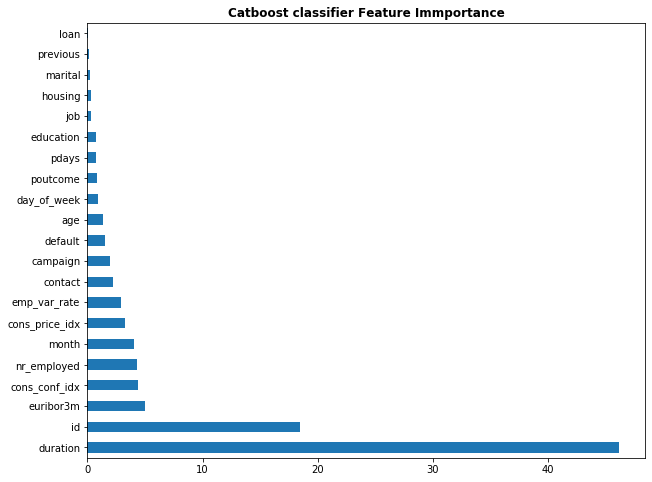

In [96]:
cat = pd.Series(catboost.feature_importances_, index=train[num_feat].columns)
cat.nlargest(22).plot(kind='barh',figsize=(10,8))
plt.title('Catboost classifier Feature Immportance', weight='bold')

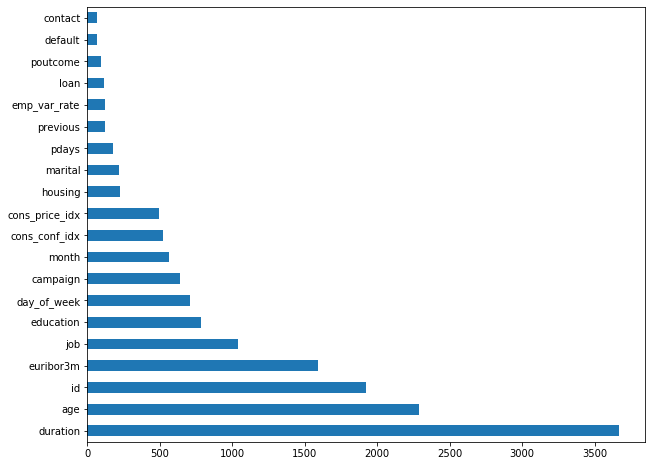

In [240]:
lgmm = pd.Series(lgm.feature_importances_, index=train[num_feat].columns)
lgmm.nlargest(20).plot(kind='barh',figsize=(10,8))

In [30]:
submission = sampleSubmission.copy()

In [56]:
submission['subscribed'] = catboost.predict(test[num_feat])

In [57]:
submission

,customer_id,subscribed
0,customer_id_32884,0
1,customer_id_3169,0
2,customer_id_32206,0
3,customer_id_9403,0
4,customer_id_14020,0
...,...,...
12352,customer_id_15908,0
12353,customer_id_28222,1
12354,customer_id_14194,0
12355,customer_id_19764,0


In [58]:
submission.to_csv('59cat_submission.csv', index=False)